In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
train = pd.read_csv('train.csv')

In [98]:
train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Column names with their indices

In [105]:
col_names = {}
for col in df.columns:
    col_names[col] = df.columns.get_loc(col)
print(col_names)

{'id': 0, 'Basic_Demos-Enroll_Season': 1, 'Basic_Demos-Age': 2, 'Basic_Demos-Sex': 3, 'CGAS-Season': 4, 'CGAS-CGAS_Score': 5, 'Physical-Season': 6, 'Physical-BMI': 7, 'Physical-Height': 8, 'Physical-Weight': 9, 'Physical-Waist_Circumference': 10, 'Physical-Diastolic_BP': 11, 'Physical-HeartRate': 12, 'Physical-Systolic_BP': 13, 'Fitness_Endurance-Season': 14, 'Fitness_Endurance-Max_Stage': 15, 'Fitness_Endurance-Time_Mins': 16, 'Fitness_Endurance-Time_Sec': 17, 'FGC-Season': 18, 'FGC-FGC_CU': 19, 'FGC-FGC_CU_Zone': 20, 'FGC-FGC_GSND': 21, 'FGC-FGC_GSND_Zone': 22, 'FGC-FGC_GSD': 23, 'FGC-FGC_GSD_Zone': 24, 'FGC-FGC_PU': 25, 'FGC-FGC_PU_Zone': 26, 'FGC-FGC_SRL': 27, 'FGC-FGC_SRL_Zone': 28, 'FGC-FGC_SRR': 29, 'FGC-FGC_SRR_Zone': 30, 'FGC-FGC_TL': 31, 'FGC-FGC_TL_Zone': 32, 'BIA-Season': 33, 'BIA-BIA_Activity_Level_num': 34, 'BIA-BIA_BMC': 35, 'BIA-BIA_BMI': 36, 'BIA-BIA_BMR': 37, 'BIA-BIA_DEE': 38, 'BIA-BIA_ECW': 39, 'BIA-BIA_FFM': 40, 'BIA-BIA_FFMI': 41, 'BIA-BIA_FMI': 42, 'BIA-BIA_Fat':

Amount of data / missing data for each variable:

In [113]:
train.count()

id                                        3960
Basic_Demos-Enroll_Season                 3960
Basic_Demos-Age                           3960
Basic_Demos-Sex                           3960
CGAS-Season                               2555
CGAS-CGAS_Score                           2421
Physical-Season                           3310
Physical-BMI                              3022
Physical-Height                           3027
Physical-Weight                           3076
Physical-Waist_Circumference               898
Physical-Diastolic_BP                     2954
Physical-HeartRate                        2967
Physical-Systolic_BP                      2954
Fitness_Endurance-Season                  1308
Fitness_Endurance-Max_Stage                743
Fitness_Endurance-Time_Mins                740
Fitness_Endurance-Time_Sec                 740
FGC-Season                                3346
FGC-FGC_CU                                2322
FGC-FGC_CU_Zone                           2282
FGC-FGC_GSND 

In [109]:
train.isna().sum()

id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
CGAS-CGAS_Score                           1539
Physical-Season                            650
Physical-BMI                               938
Physical-Height                            933
Physical-Weight                            884
Physical-Waist_Circumference              3062
Physical-Diastolic_BP                     1006
Physical-HeartRate                         993
Physical-Systolic_BP                      1006
Fitness_Endurance-Season                  2652
Fitness_Endurance-Max_Stage               3217
Fitness_Endurance-Time_Mins               3220
Fitness_Endurance-Time_Sec                3220
FGC-Season                                 614
FGC-FGC_CU                                1638
FGC-FGC_CU_Zone                           1678
FGC-FGC_GSND 

That's a lot of missing data!

We are trying to predict the Severity Impairment Index (sii) for each patient; 1224 out of 3960 of these in the training set are not labeled. Possibly we could use the Sleep Disturbance Scale or the number of hours of Internet Use to help indicate problematic internet use?

In [111]:
train.iloc[:,55:82].isna().sum()

PCIAT-PCIAT_01                            1227
PCIAT-PCIAT_02                            1226
PCIAT-PCIAT_03                            1229
PCIAT-PCIAT_04                            1229
PCIAT-PCIAT_05                            1231
PCIAT-PCIAT_06                            1228
PCIAT-PCIAT_07                            1231
PCIAT-PCIAT_08                            1230
PCIAT-PCIAT_09                            1230
PCIAT-PCIAT_10                            1227
PCIAT-PCIAT_11                            1226
PCIAT-PCIAT_12                            1229
PCIAT-PCIAT_13                            1231
PCIAT-PCIAT_14                            1228
PCIAT-PCIAT_15                            1230
PCIAT-PCIAT_16                            1232
PCIAT-PCIAT_17                            1235
PCIAT-PCIAT_18                            1232
PCIAT-PCIAT_19                            1230
PCIAT-PCIAT_20                            1227
PCIAT-PCIAT_Total                         1224
SDS-Season   

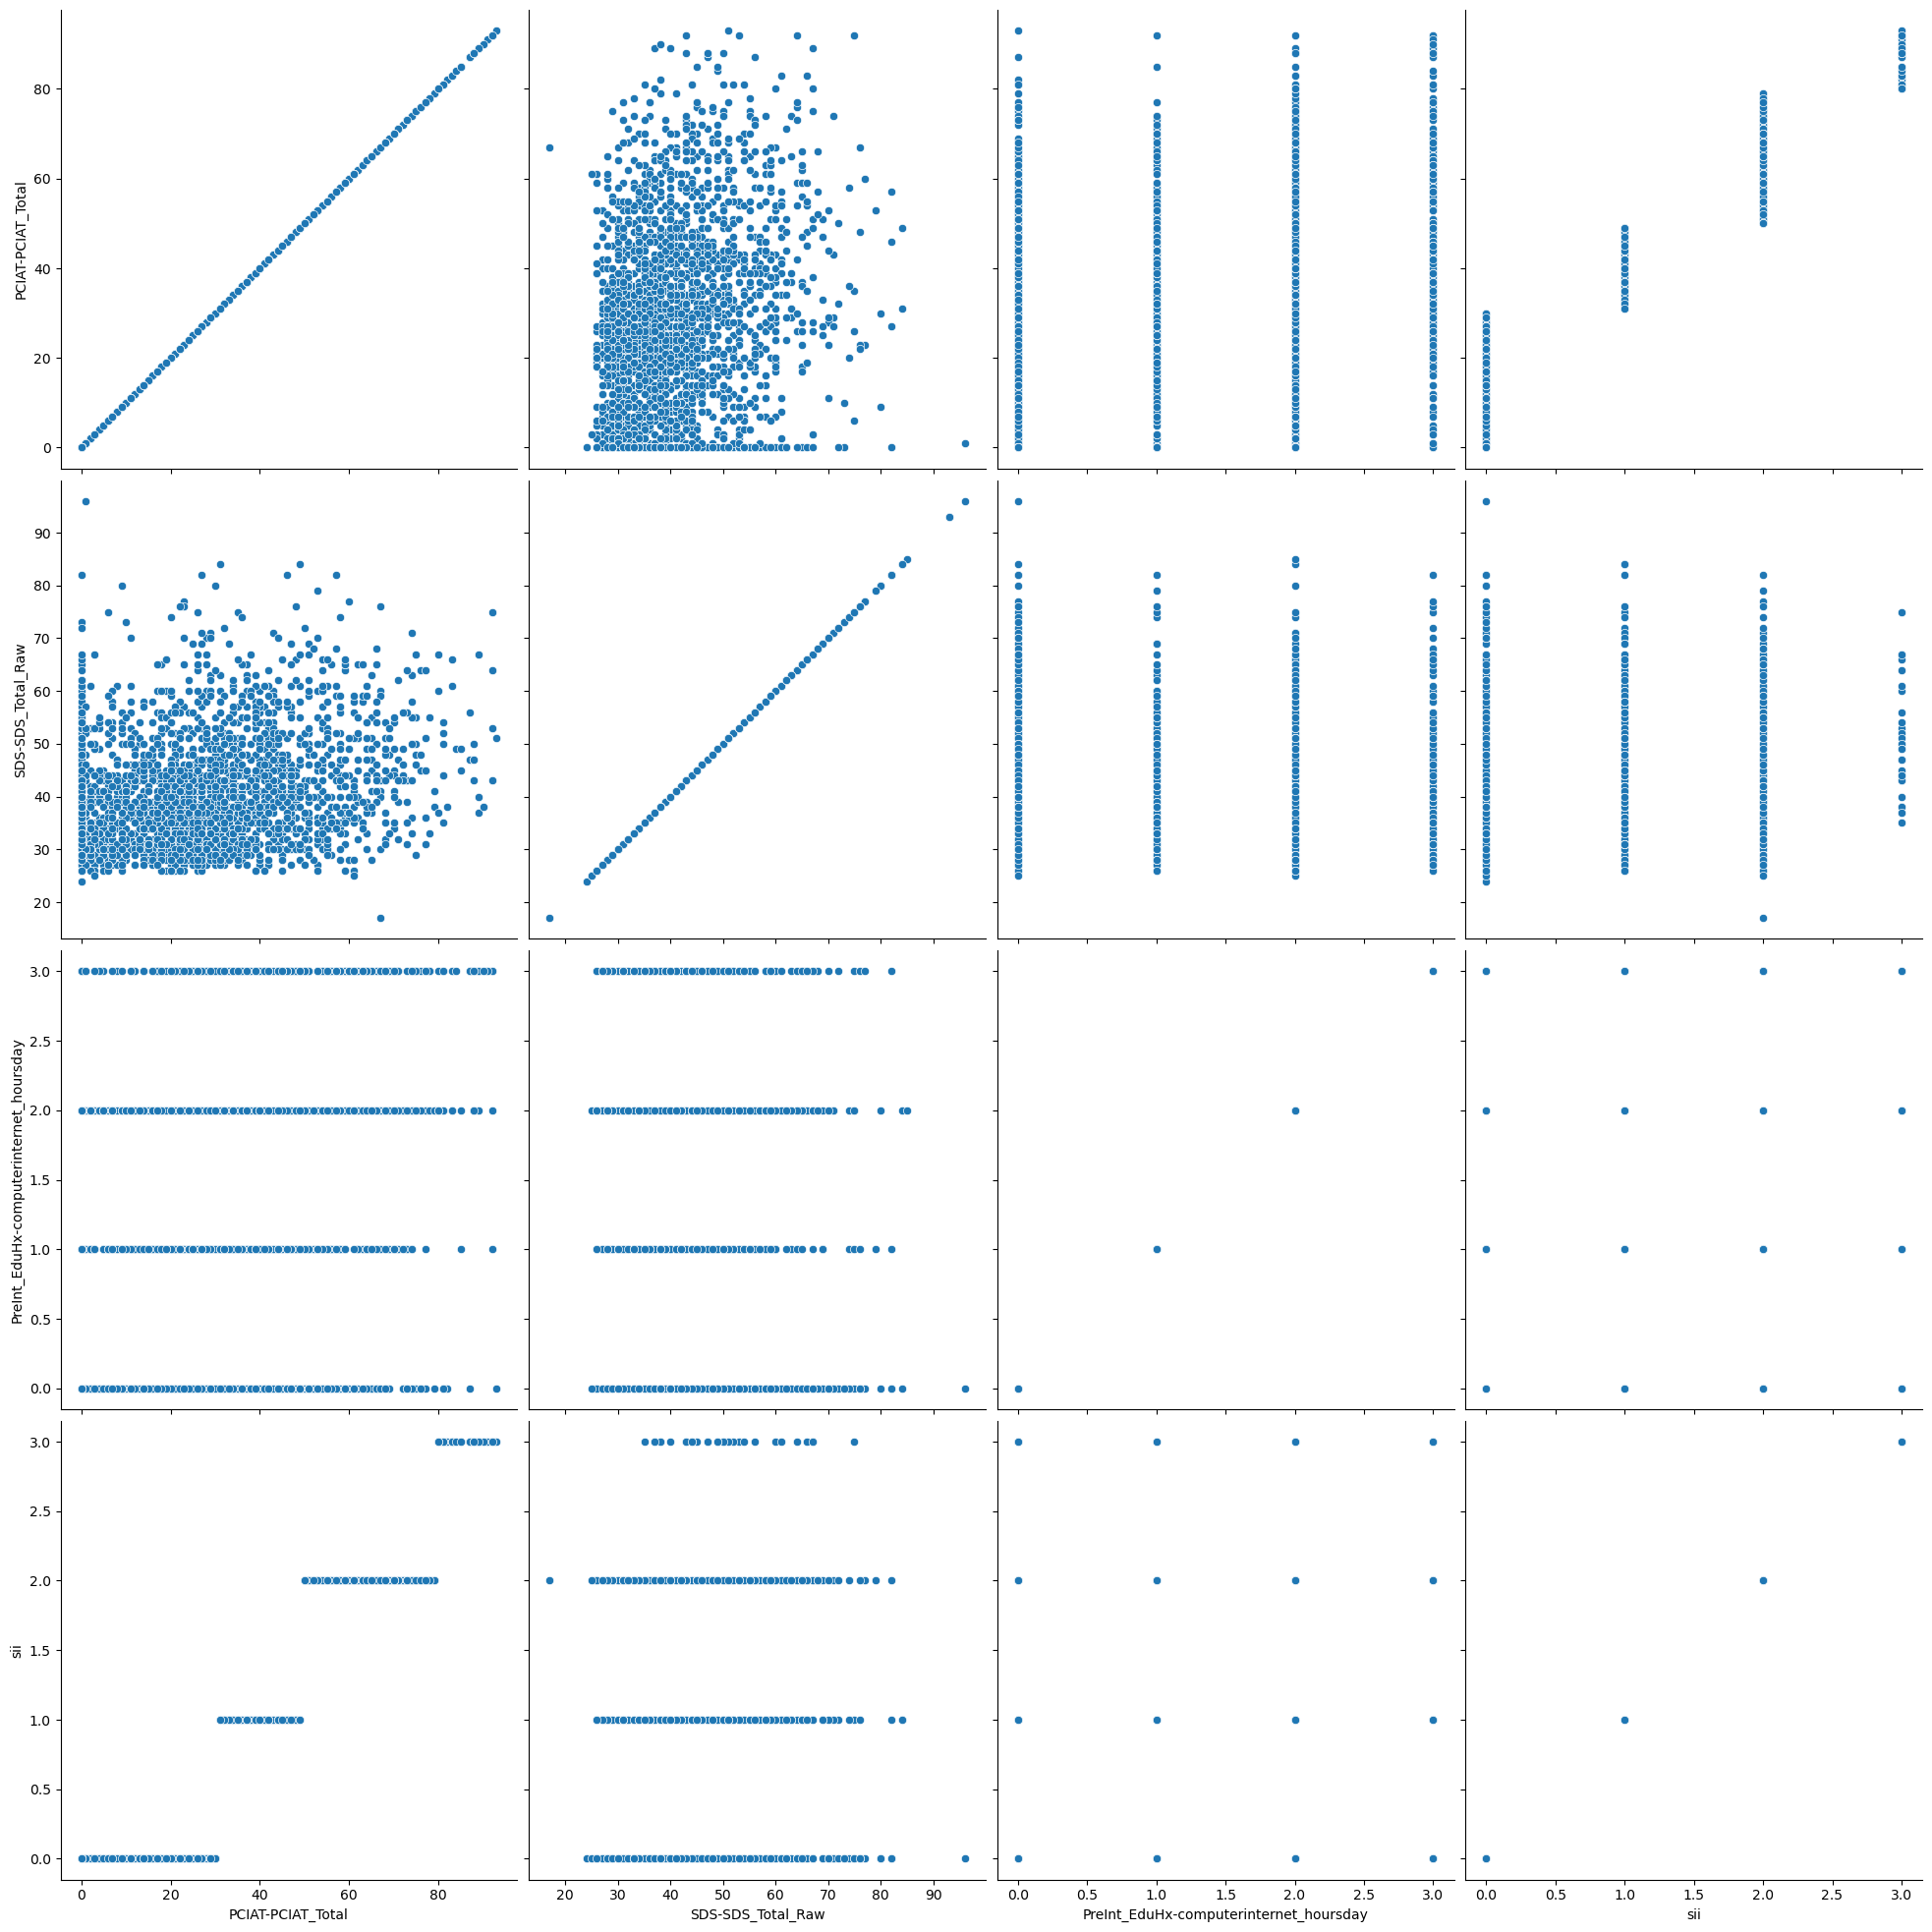

In [120]:
train_usage_scores = train[['PCIAT-PCIAT_Total','SDS-SDS_Total_Raw','PreInt_EduHx-computerinternet_hoursday','sii']]

sns.pairplot(train_usage_scores,
                height = 5,
                diag_kind = None)

plt.show()

Doesn't look promising.

Let's take a look at the sii scores (from the PCIAT scores) we do have.

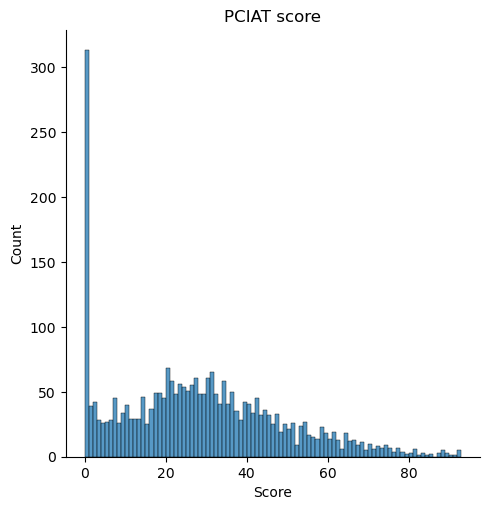

In [123]:
sns.displot(train, x="PCIAT-PCIAT_Total",binwidth=1)
plt.title('PCIAT score')
plt.xlabel("Score");
plt.ylabel("Count");

plt.show()


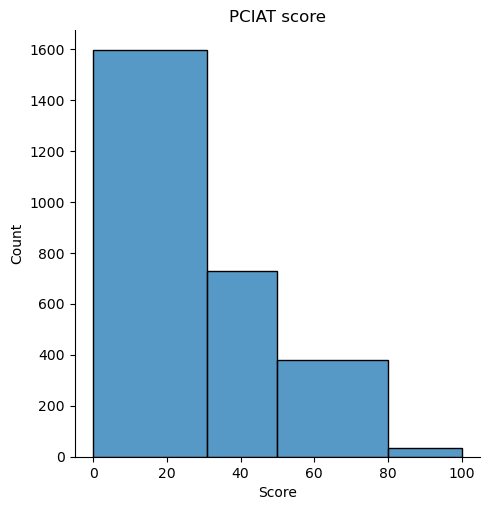

In [124]:
sns.displot(train, x="PCIAT-PCIAT_Total",bins=[0,31,50,80,100])
plt.title('PCIAT score')
plt.xlabel("Score");
plt.ylabel("Count");

plt.show()

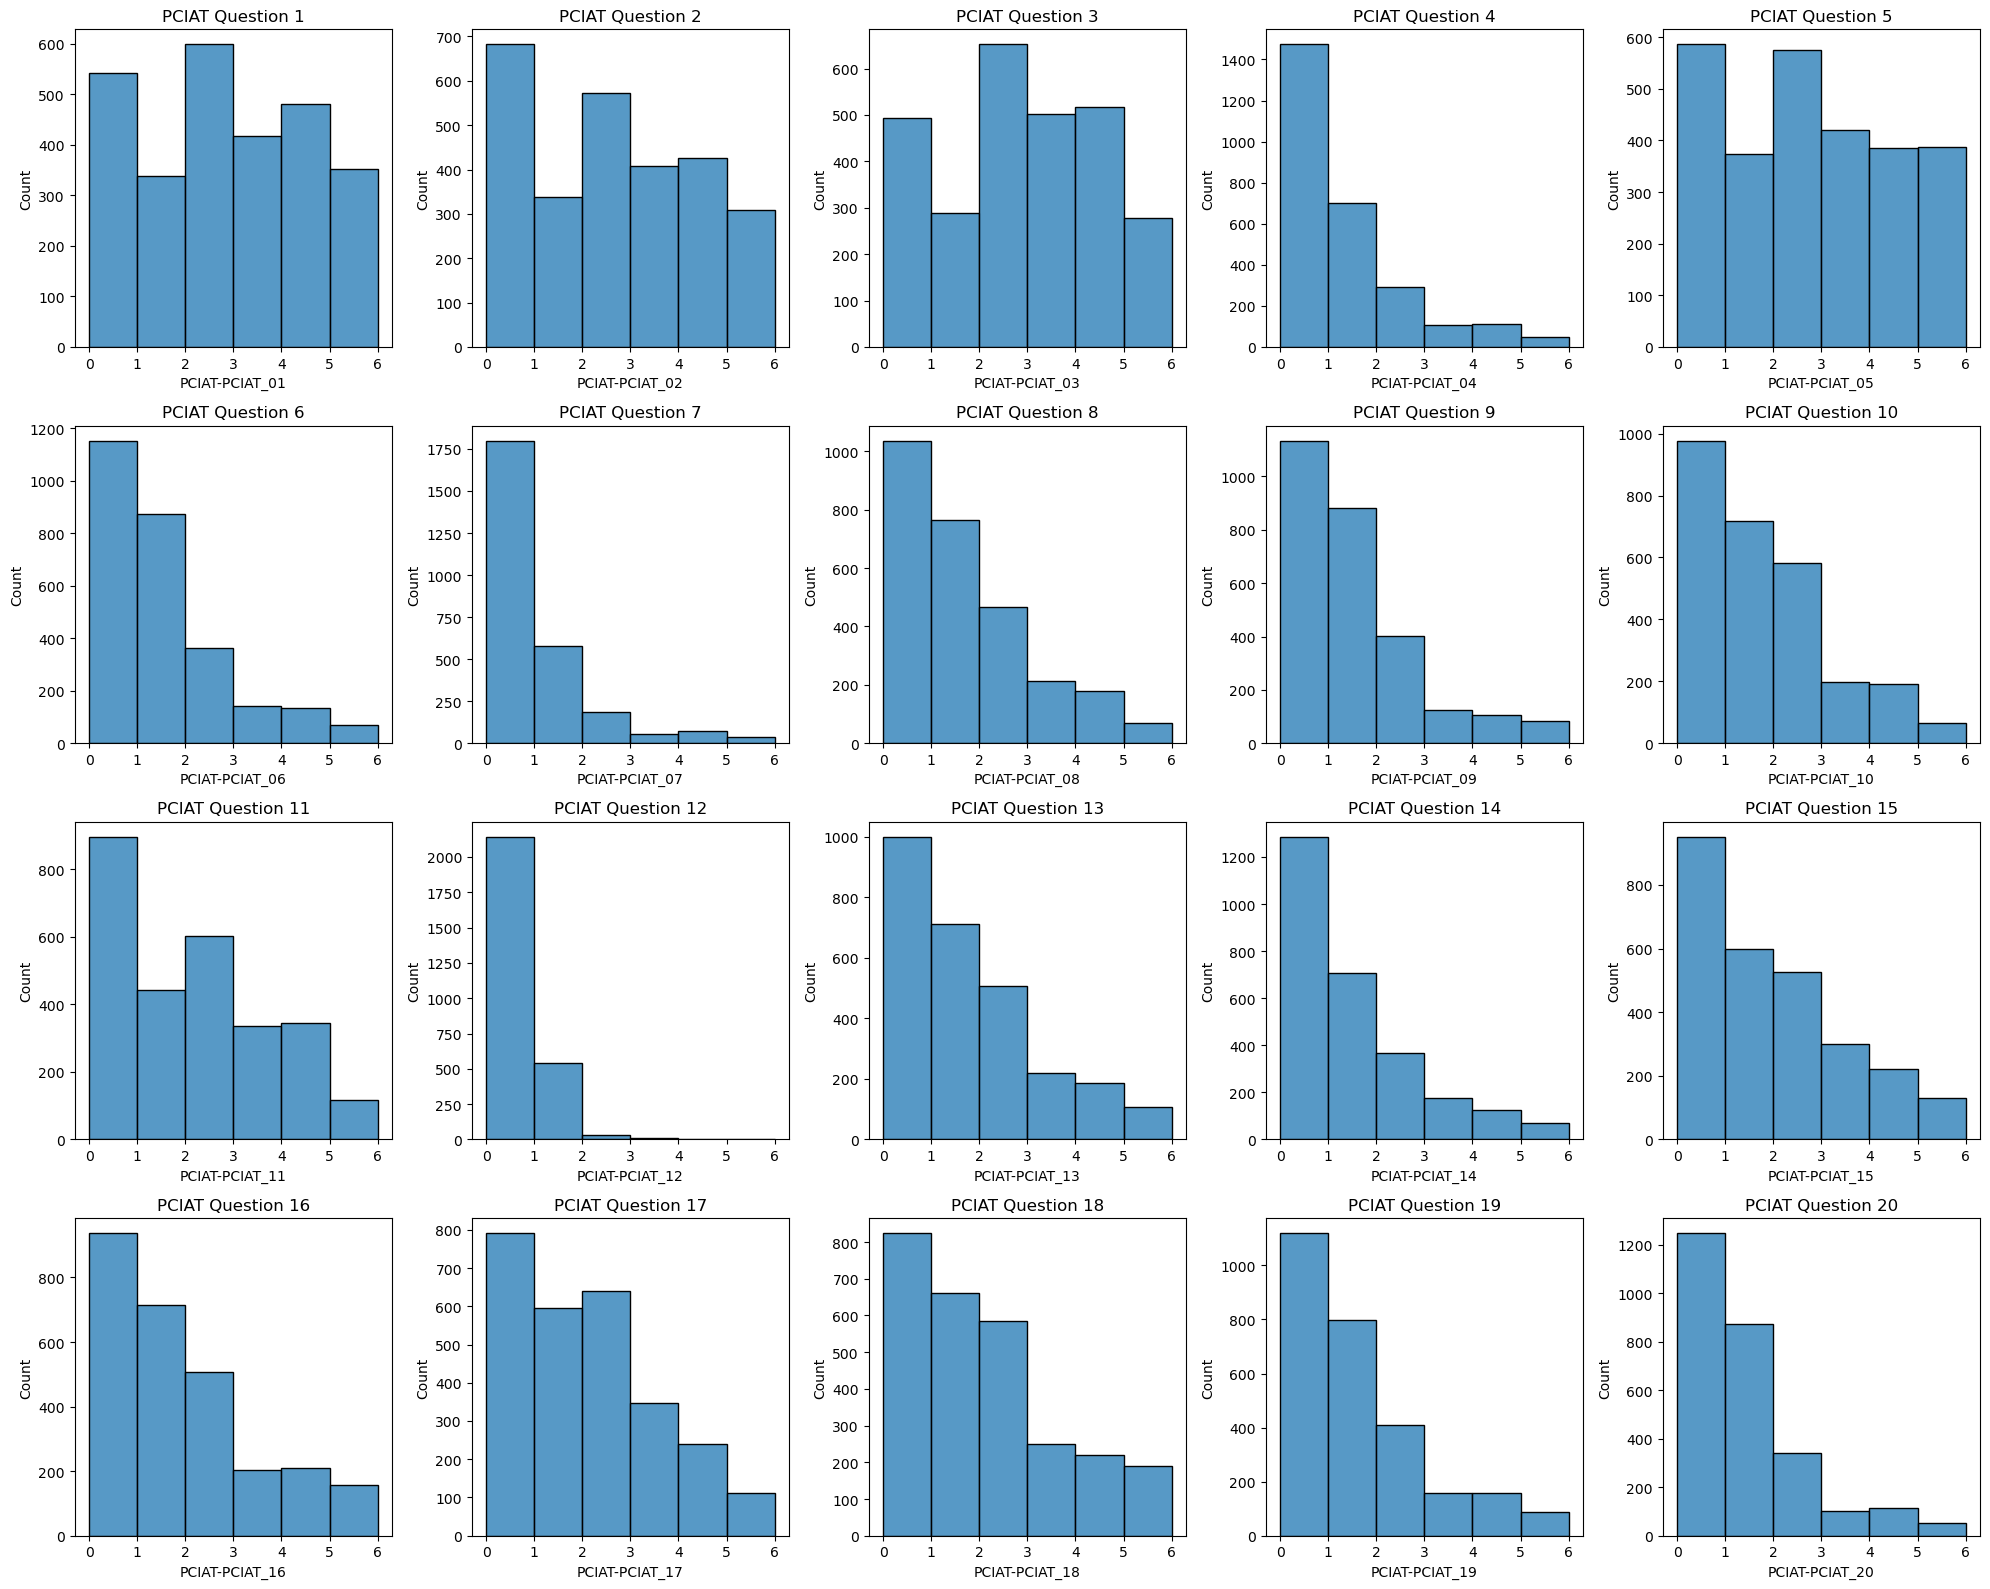

In [129]:
# Histograms for all 20 PCIAT items

# Create a figure with a 4x5 grid of subplots (for a total of 20 subplots)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))  # Adjusted figsize for better layout
axes = axes.flatten()

# Loop through the selected columns (columns 55 to 74) and create histograms
for i, col in enumerate(range(55, 75)): 
    ax = axes[i]
    sns.histplot(df, x=train.iloc[:, col], bins=[0,1,2,3,4,5,6], ax=ax)
    ax.set_title(f'PCIAT Question {col-54}')  

plt.tight_layout()
plt.show()


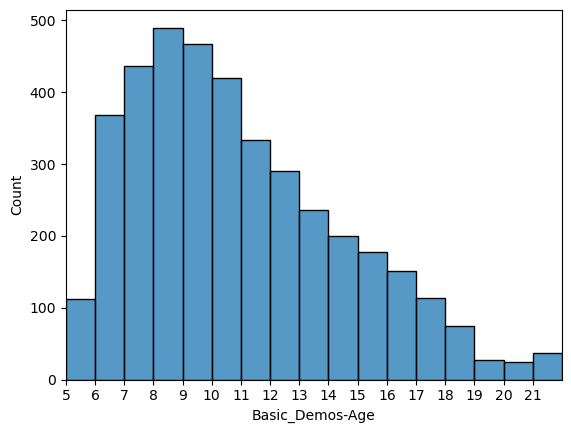

In [127]:
fig, ax = plt.subplots()
sns.histplot(train, x="Basic_Demos-Age",binwidth=1)
ax.set_xlim(5,22)
ax.set_xticks(range(5,22))
plt.show()